# Lancés de pièce

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.lines as lines

In [2]:
df = pd.read_csv("akinatorIA3F3.csv")
dftot = pd.DataFrame(df[df.columns[1:]].stack())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0             30 non-null     object 
 1   Groupe 1  30 non-null     float64
 2   Groupe 2  30 non-null     float64
 3   Groupe 3  30 non-null     float64
 4   Groupe 4  30 non-null     float64
 5   Groupe 5  30 non-null     int64  
 6   Groupe 6  30 non-null     float64
 7   Groupe 7  30 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ KB


In [4]:
dftot

0
0  Groupe 1 -51.0
   Groupe 2  30.0
   Groupe 3  20.0
   Groupe 4   0.0
   Groupe 5  23.0
...           ...
29 Groupe 3 -29.0
   Groupe 4  50.0
   Groupe 5  10.0
   Groupe 6 -51.5
   Groupe 7  -5.5

[210 rows x 1 columns]

In [5]:
dftot = pd.DataFrame(dftot[0].astype("str").str.replace(",", ".").astype("float")).rename(columns={0: "Distance"})

In [6]:
pop = dftot["Distance"]

## La distribution de 210 mesures à 3m

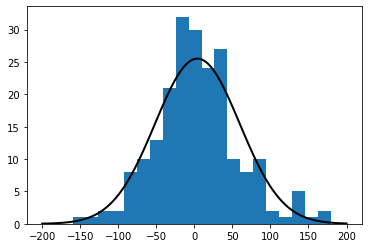

In [7]:
N = len(pop)
num_bins = 20
plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std())* N * bin_width
plt.plot(x, p, 'k', linewidth=2)

## La densité de probabilité

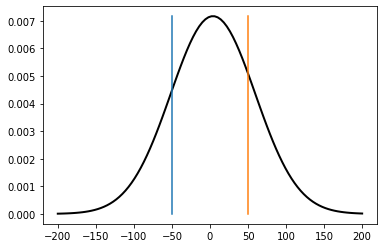

In [8]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

## La probabilité cumulée

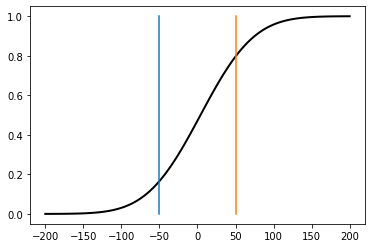

In [9]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.cdf(x, pop.mean(), pop.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

Probabilité que ma mesure soit < -50cm

In [10]:
pmin = norm(pop.mean(), pop.std()).cdf(-50)

Probabilité que ma mesure soit < 50cm

In [11]:
pmax = norm(pop.mean(), pop.std()).cdf(50)

Probabilité que ma mesure soit > -50cm et < 50cm

In [12]:
pmax - pmin

0.630120454184887

Probabilité que ma mesure soit > 50cm

In [13]:
1 - pmax

0.2039379008080877

La mesure seuil correspondant à une probabilité de 30%

In [14]:
norm(pop.mean(), pop.std()).ppf(0.3)

-25.19824061586955

## Les grandeurs stats de la population à 3m.

In [15]:
sigma = dftot["Distance"].std()
sigma

55.61843504566346

In [16]:
ste = dftot["Distance"].std() / np.sqrt(210)
ste

3.8380366489532154

In [17]:
mean = dftot["Distance"].mean()
mean

3.9680952380952377

## P-Value

### Démarche pour invalider une hypothèse nulle H0

- Ha : Vous êtes moins précis pour jeter un pièce exactement à 10m, plutôt qu'a 3m.
- Mise en place de l'expérience: Vous lancez tous 2 pièces à 10m.
- Moyenne des lancés qui est de 25cm.
- N = 42

H0 : Vous êtes aussi précis peut importe la distance.

Si H0 est vérifiée:
- La moyenne devrait être de 3.96cm
- L'écart type devrait être de 55.6cm.
- L'erreur standard est de 8.58cm.

In [18]:
ste = sigma / np.sqrt(42)

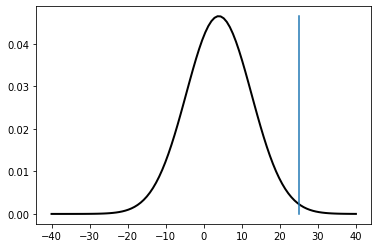

In [19]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.pdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([25,25],[0, np.max(p)])
#plt.plot([50,50],[0, np.max(p)])

In [20]:
norm(mean,ste).ppf(0.95)
norm(mean,ste).ppf(0.05)

-10.14822091581285

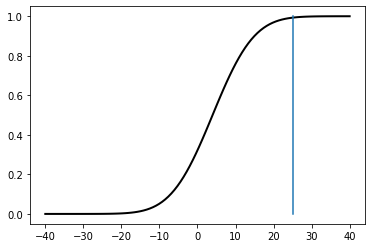

In [21]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([25,25],[0, np.max(p)])
#plt.plot([50,50],[0, np.max(p)])

In [22]:
(1 - norm(mean, sigma / np.sqrt(42)).cdf(25)) * 100

0.7129569445270767

Probabilité de trouver la mesure 25cm si l'H0 est de 0,7%.
0,7% est appelée __p-value__

Pour un seuil à alpha 5% on ne peut pas rejeter l'hypothèse nulle. Donc on ne peut pas prouver que changer la distance impacte le resultat dans cet exemple

## Votre tour : Calculer la p-value

- Calculer les p-value pour les mesures faites à 1m, 2m, 4m, 5m, 6m
- Tracer l'évolution de la p-value en fonction de la distance
- Optionnel: Si les points semblent suivre une tendance. Définir cette tendance et en déduire à partir de quel distance on ne peut plus reje